## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [2]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape (righe, colonne): (714, 12)

Valori mancanti per colonna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

Numero di righe duplicate: 0

Età media per classe:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


C:\Users\sanic\AppData\Local\Temp\ipykernel_14280\3132549631.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(valore_frequente, inplace=True)


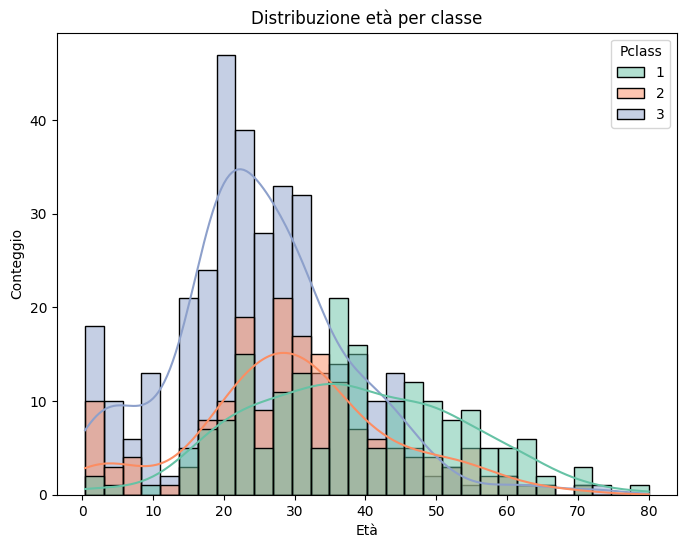

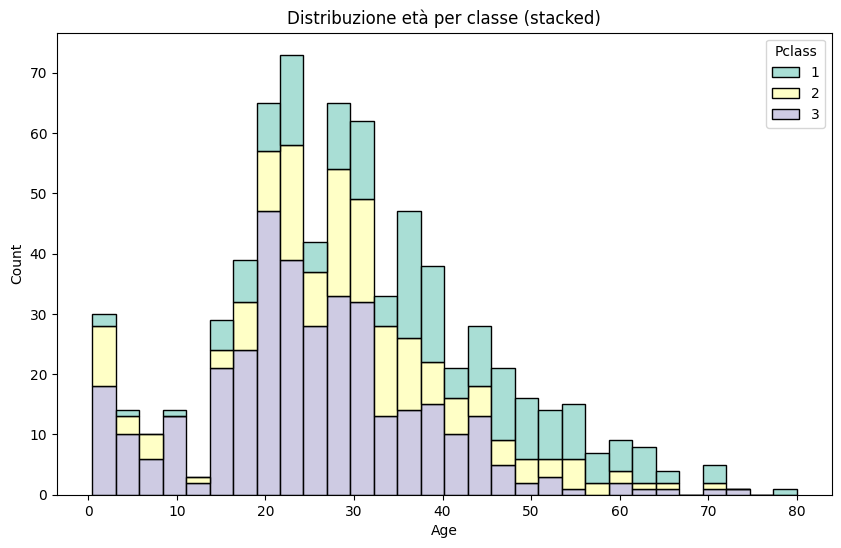

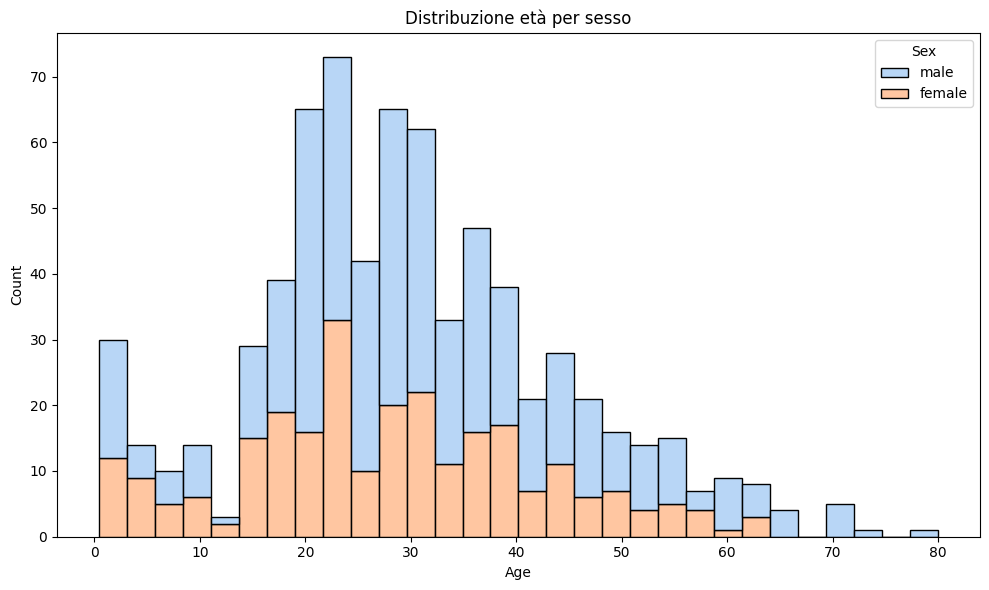

In [4]:
# 1. Quante righe e colonne ha il dataset?
print("Shape (righe, colonne):", df.shape)

# 2. Valori mancanti per colonna
print("\nValori mancanti per colonna:")
print(df.isnull().sum())

# 3. Riempi i valori mancanti in 'Embarked' con il valore più frequente
valore_frequente = df['Embarked'].mode()[0]
df['Embarked'].fillna(valore_frequente, inplace=True)

# 4. Rimuovi le righe dove 'Age' è mancante
df = df.dropna(subset=['Age'])

# 5. Controlla se ci sono righe duplicate
print("\nNumero di righe duplicate:", df.duplicated().sum())

# 6. Età media dei passeggeri per classe (Pclass) con valori mancanti già rimossi
media_eta_per_classe = df.groupby('Pclass')['Age'].mean()
print("\nEtà media per classe:")
print(media_eta_per_classe)

# 7. Visualizza la distribuzione dell’età per classe
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Pclass', bins=30, kde=True, palette='Set2')
plt.title('Distribuzione età per classe')
plt.xlabel('Età')
plt.ylabel('Conteggio')
plt.show()

# 8. Visualizza la distribuzione dell’età per classe e sesso
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', bins=30, palette='Set3')
plt.title('Distribuzione età per classe (stacked)')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', bins=30, palette='pastel')
plt.title('Distribuzione età per sesso')

plt.tight_layout()
plt.show()